In [1]:
#Menggimport library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#membaca dataset dan menampilkan nya
dataset = '/content/Coffee_Chain_Sales .csv'
df = pd.read_csv(dataset)
df

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [3]:
#Memberikan informasi lengkap tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Area Code                               1062 non-null   int64 
 1   Cogs                                    1062 non-null   int64 
 2   DifferenceBetweenActualandTargetProfit  1062 non-null   int64 
 3   Date                                    1062 non-null   object
 4   Inventory Margin                        1062 non-null   int64 
 5   Margin                                  1062 non-null   int64 
 6   Market_size                             1062 non-null   object
 7   Market                                  1062 non-null   object
 8   Marketing                               1062 non-null   int64 
 9   Product_line                            1062 non-null   object
 10  Product_type                            1062 non-null   object
 11  Prod

In [4]:
#membangun dan menguji model Support Vector Regression (SVR) menggunakan Scikit-Learn di Python
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

In [5]:
#Menghapus baris yang mengandung nilai-nilai yang hilang (NaN) dari DataFrame.
df.dropna(inplace=True)
# Mengambil kolom 'Marketing' sebagai fitur (X) dan kolom 'Sales' sebagai target (y).
X = df['Marketing'].values.reshape(-1, 1)
y = df['Sales'].values
# Menggunakan imputer untuk mengisi nilai-nilai yang hilang dengan nilai rata-rata.
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
#Membagi dataset menjadi data pelatihan dan pengujian.
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)
# Membuat model SVR dengan parameter tertentu (C, gamma, kernel).
svr_model = SVR(C=1000, gamma=0.05, kernel='rbf')
# Melatih model SVR menggunakan data pelatihan.
svr_model.fit(X_train, y_train)
#Melakukan prediksi menggunakan model SVR pada data pengujian.
y_pred = svr_model.predict(X_test)
#Menghitung Mean Squared Error antara nilai sebenarnya dan nilai yang diprediksi.
mse = mean_squared_error(y_test, y_pred)
# Menampilkan Mean Squared Error hasil evaluasi model.
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6474.605652901048


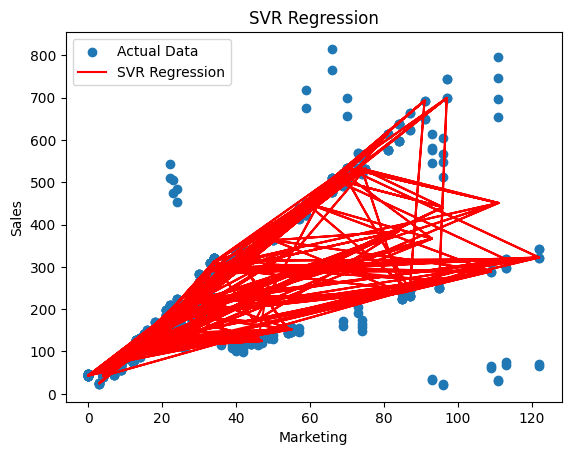

In [6]:
#Melakukan visualisasi
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Actual Data')
plt.plot(X, svr_model.predict(X), color='red', label='SVR Regression')

#Melakukan pelabelan pada sumbu x dan sumbu y
plt.xlabel('Marketing')
plt.ylabel('Sales')
plt.title('SVR Regression')
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel': ['rbf'],
    'C': [1000, 10000, 100000],
    'gamma': [0.5, 0.05, 0.005]
}

#Insiasialisasi Grid Seach CV
grid_search = GridSearchCV(svr_model, param_grid, cv=5)
#Melakukan pencarian grid yang terbaik
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')
#Mendapatkan Model terbaik
best_model = grid_search.best_estimator_
#Menguji model
y_pred = best_model.predict(X_test)

#Melakukan perhtungan nilai Mse
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Best Parameters: {'C': 100000, 'gamma': 0.05, 'kernel': 'rbf'}
Mean Squared Error on Test Set: 5844.565171451155


In [8]:
#Melakukan pemodelan dengan menggunakan SVR setelah melakukan pencarian GridSearchCV
model_baru = SVR(C=100000, gamma=0.005, kernel='rbf')
model_baru.fit(X,y)

SVR(C=100000, gamma=0.005)

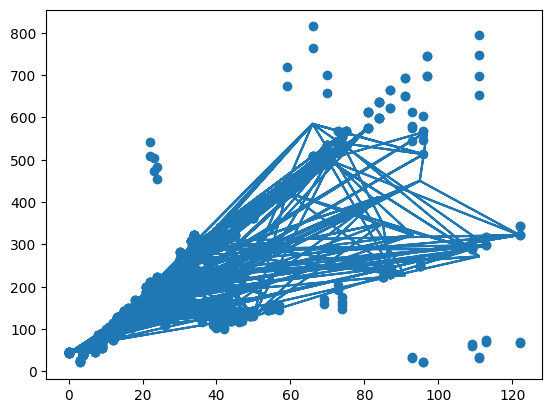

In [9]:
#visualisasikan model
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model_baru.predict(X))